In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [3]:
df=pd.read_csv(r"/Users/nmglwr/Documents/DS course/python/files/ML project 2/TMDB_tv_dataset_v3.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

In [5]:
df.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000
mean,111307.074704,1.548497,24.465082,13.305054,2.333843,5.882644,22.603348
std,76451.662352,2.942872,134.799622,190.809059,3.454334,42.023216,47.950427
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45936.500000,1.000000,1.000000,0.000000,0.000000,0.600000,0.000000
50%,97734.000000,1.000000,6.000000,0.000000,0.000000,0.857000,0.000000
75%,196923.500000,1.000000,20.000000,1.000000,6.000000,2.431500,42.000000
max,251213.000000,240.000000,20839.000000,21857.000000,10.000000,3707.008000,6032.000000


In [7]:
df["original_language"] = df["original_language"].astype('string')

df["adult"] = df["adult"].astype('int')
df["in_production"] = df["in_production"].astype('int')

df["first_air_date"] = pd.to_datetime(df["first_air_date"])
df["last_air_date"] = pd.to_datetime(df["last_air_date"])

df['name'] = df['name'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string')
df['original_name'] = df['original_name'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string') # maybe change if name and original name are the same
df['original_language'] = df['original_language'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string')
df['tagline'] = df['tagline'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string') # maybe delete
df['genres'] = df['genres'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string')# split to genres
df['languages'] = df['languages'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string') # split to languages
df['original_language'] = df['original_language'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string') # split to languages
df['networks'] = df['networks'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string') # split to networks
df['origin_country'] = df['origin_country'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string') # split to origin countries
df['spoken_languages'] = df['spoken_languages'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).astype('string') # split to origin countries
df['production_countries'] = df['production_countries'].str.replace(r'[^a-zA-Z0-9,\s]', '', regex=True).astype('string') # split to origin production countries


# all splits:
# split by space to columns and the delete space before and after, then put true false for every column with many values

In [8]:
df['type']=df['type'].astype('category').cat.codes
df['status']=df['status'].astype('category').cat.codes

In [12]:
del df["backdrop_path"] # delete

del df["homepage"] # delete

del df["poster_path"] # delete

del df["production_companies"] # delete

del df["overview"] # delete

del df["created_by"] # delete


In [16]:
df["year_air"] = df['first_air_date'].dt.year
df = df[df["year_air"] >= 2015]

In [18]:
df['name'] = df['name'].replace(r'^\s*$', np.nan, regex=True)
df['original_name'] = df['original_name'].replace(r'^\s*$', np.nan, regex=True)

df['compare_name'] = np.where(
    (df['name'] == df['original_name']) & 
    pd.notna(df['name']) & 
    pd.notna(df['original_name']),
    1,
    np.where(
        pd.isna(df['name']) | pd.isna(df['original_name']),
        np.nan,
        0
    )
)

del df["original_name"] # delete
del df["name"] # delete


In [20]:
df["tagline"] = np.where(pd.notna(df['tagline']), 1, 0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72327 entries, 1 to 168638
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    72327 non-null  int64         
 1   number_of_seasons     72327 non-null  int64         
 2   number_of_episodes    72327 non-null  int64         
 3   original_language     72327 non-null  string        
 4   vote_count            72327 non-null  int64         
 5   vote_average          72327 non-null  float64       
 6   adult                 72327 non-null  int64         
 7   first_air_date        72327 non-null  datetime64[ns]
 8   last_air_date         71362 non-null  datetime64[ns]
 9   in_production         72327 non-null  int64         
 10  popularity            72327 non-null  float64       
 11  type                  72327 non-null  int8          
 12  status                72327 non-null  int8          
 13  tagline             

In [24]:
df

,id,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,adult,first_air_date,last_air_date,in_production,...,tagline,genres,languages,networks,origin_country,spoken_languages,production_countries,episode_run_time,year_air,compare_name
1,71446,3,41,es,17836,8.257,0,2017-05-02,2021-12-03,0,...,1,Crime Drama,es,Netflix Antena 3,ES,Espaol,Spain,70,2017.0,0.0
2,66732,4,34,en,16161,8.624,0,2016-07-15,2022-07-01,1,...,1,Drama SciFi Fantasy Mystery,en,Netflix,US,English,United States of America,0,2016.0,1.0
4,63174,6,93,en,13870,8.486,0,2016-01-25,2021-09-10,0,...,1,Crime SciFi Fantasy,en,FOX Netflix,US,English,United States of America,45,2016.0,1.0
5,69050,7,137,en,13180,8.479,0,2017-01-26,2023-08-23,0,...,1,Crime Drama Mystery,en,The CW,US,English,United States of America,45,2017.0,1.0
6,93405,2,9,ko,13053,7.831,0,2021-09-17,2021-09-17,1,...,1,Action Adventure Mystery Drama,en ko ur,Netflix,KR,English,South Korea,0,2021.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168632,240609,1,1,th,0,0.000,0,2024-03-06,NaT,1,...,0,Drama,th,GMM 25,TH,,Thailand,0,2024.0,NaN
168633,240693,1,8,de,0,0.000,0,2023-11-30,2023-11-30,1,...,0,Comedy Action Adventure Drama,de,Amazon Freevee,DE,Deutsch,<NA>,0,2023.0,1.0
168634,239099,1,1,zh,0,0.000,0,2023-03-03,2023-03-03,1,...,0,<NA>,<NA>,<NA>,CN,<NA>,<NA>,0,2023.0,NaN
168636,240696,1,1,bn,0,0.000,0,2023-11-30,2023-11-30,1,...,0,Crime,bn,<NA>,IN,,India,0,2023.0,1.0


In [26]:
def split_columns(df, col, char=' '):
    original_df = df.copy()
    unique_words = set()
    for text in original_df[col]:
        if pd.notna(text):
            words = [word for word in text.split(char) if word]
            unique_words.update(words)
    new_columns = {}
    for word in unique_words:
        new_columns[word] = original_df[col].apply(lambda x: word in x.split(char) if pd.notna(x) else np.nan)
    df_new = pd.DataFrame(new_columns)
    df_new = df_new.astype('float')
    #df_new["id"] = original_df
    return df_new

def drop_columns(df, col):
    value_counts = 100 * df.sum()/df.shape[0]
    index_to_drop = value_counts[value_counts < 5].index.tolist()
    has_nan = df[index_to_drop].isna().any(axis=1)
    summed_values = df[index_to_drop].sum(axis=1)
    df['other_' + col] = summed_values.apply(lambda x: 1 if x > 0 else 0)
    df.loc[has_nan, 'other_' + col] = np.nan
    #df['other_'+col] = df[index_to_drop].sum(axis=1)
    df = df.drop(columns=index_to_drop)
    return df

def merge_df(df1, df2, col):
    # merged_df = pd.merge(df1, df2, on='id', how='inner')
    merged_df = pd.concat([df1, df2], axis=1)
    merged_df = merged_df.drop(columns=col)
    return merged_df


In [28]:
cols_to_split = ['genres','languages','original_language','networks','origin_country','spoken_languages','production_countries']

In [30]:
df_old = df.copy()
for col in cols_to_split[:-1]:
    df_temp = split_columns(df_old, col)
    df_temp = drop_columns(df_temp, col)
    merged_df = merge_df(df_old, df_temp, col)
    df_old = merged_df.copy()


df_temp = split_columns(df_old, 'production_countries', ',')
df_temp = drop_columns(df_temp, 'production_countries')
merged_df = merge_df(df_old, df_temp, 'production_countries')
merged_df

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,in_production,popularity,...,GB,KR,other_origin_country,Franais,English,other_spoken_languages,United States of America,China,Japan,other_production_countries
1,71446,3,41,17836,8.257,0,2017-05-02,2021-12-03,0,96.354,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,66732,4,34,16161,8.624,0,2016-07-15,2022-07-01,1,185.711,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,63174,6,93,13870,8.486,0,2016-01-25,2021-09-10,0,416.668,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,69050,7,137,13180,8.479,0,2017-01-26,2023-08-23,0,143.750,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,93405,2,9,13053,7.831,0,2021-09-17,2021-09-17,1,115.587,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168632,240609,1,1,0,0.000,0,2024-03-06,NaT,1,0.600,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
168633,240693,1,8,0,0.000,0,2023-11-30,2023-11-30,1,3.028,...,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
168634,239099,1,1,0,0.000,0,2023-03-03,2023-03-03,1,1.400,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168636,240696,1,1,0,0.000,0,2023-11-30,2023-11-30,1,1.895,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# example
# df_genres = split_columns(df, 'genres')
# df_genres = drop_columns(df_genres)
# merged_df = merge_df(df, df_genres, 'genres')
# merged_df

In [32]:
merged_df.to_csv('TV_new_cols.csv', index=False)
merged_df.to_pickle('TV_new_cols.pkl')

# EDA

In [6]:
df = pd.read_pickle(r"/Users/nmglwr/Documents/DS course/python/files/ML project 2/TV_new_cols.pkl")

## Desprictive

In [8]:
df

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,in_production,popularity,...,GB,KR,other_origin_country,Franais,English,other_spoken_languages,United States of America,China,Japan,other_production_countries
1,71446,3,41,17836,8.257,0,2017-05-02,2021-12-03,0,96.354,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,66732,4,34,16161,8.624,0,2016-07-15,2022-07-01,1,185.711,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,63174,6,93,13870,8.486,0,2016-01-25,2021-09-10,0,416.668,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,69050,7,137,13180,8.479,0,2017-01-26,2023-08-23,0,143.750,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,93405,2,9,13053,7.831,0,2021-09-17,2021-09-17,1,115.587,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168632,240609,1,1,0,0.000,0,2024-03-06,NaT,1,0.600,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
168633,240693,1,8,0,0.000,0,2023-11-30,2023-11-30,1,3.028,...,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
168634,239099,1,1,0,0.000,0,2023-03-03,2023-03-03,1,1.400,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168636,240696,1,1,0,0.000,0,2023-11-30,2023-11-30,1,1.895,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
df.shape

(72327, 49)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72327 entries, 1 to 168638
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          72327 non-null  int64         
 1   number_of_seasons           72327 non-null  int64         
 2   number_of_episodes          72327 non-null  int64         
 3   vote_count                  72327 non-null  int64         
 4   vote_average                72327 non-null  float64       
 5   adult                       72327 non-null  int64         
 6   first_air_date              72327 non-null  datetime64[ns]
 7   last_air_date               71362 non-null  datetime64[ns]
 8   in_production               72327 non-null  int64         
 9   popularity                  72327 non-null  float64       
 10  type                        72327 non-null  int8          
 11  status                      72327 non-null  int8          

In [14]:
df.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,in_production,popularity,...,GB,KR,other_origin_country,Franais,English,other_spoken_languages,United States of America,China,Japan,other_production_countries
count,72327.000000,72327.000000,72327.000000,72327.000000,72327.000000,72327.000000,72327,71362,72327.000000,72327.000000,...,62027.000000,62027.000000,62027.000000,51086.000000,51086.000000,51086.000000,42207.000000,42207.000000,42207.000000,42207.000000
mean,152137.647808,1.384310,17.252340,15.932349,2.704709,0.011725,2020-02-27 12:27:27.915715840,2020-08-16 11:26:45.930327296,0.636830,5.621587,...,0.064133,0.069695,0.485111,0.074012,0.297812,0.309185,0.131021,0.097425,0.101405,0.674817
min,344.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 00:00:00,1982-10-04 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98257.500000,1.000000,3.000000,0.000000,0.000000,0.000000,2018-02-13 12:00:00,2018-10-26 00:00:00,0.000000,0.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,133766.000000,1.000000,8.000000,0.000000,0.000000,0.000000,2020-07-04 00:00:00,2021-02-08 00:00:00,1.000000,1.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,215589.500000,1.000000,16.000000,1.000000,6.648500,0.000000,2022-04-07 00:00:00,2022-09-21 00:00:00,1.000000,2.761500,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,251213.000000,75.000000,2107.000000,17836.000000,10.000000,1.000000,2046-02-24 00:00:00,2024-04-04 00:00:00,1.000000,3707.008000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,60720.730904,1.252091,42.529404,210.816644,3.613101,0.107644,NaN,NaN,0.480917,45.840851,...,0.244992,0.254635,0.499782,0.261794,0.457301,0.462162,0.337427,0.296539,0.301868,0.468449


In [44]:
# Type of valaues 
df.dtypes.to_excel("TV_datatype.xlsx",
             sheet_name='data_type')
# Maximum valaues 
df.select_dtypes(include=['number']).max().to_excel("max_TV.xlsx",
             sheet_name='max')
# Minimum Values
df.select_dtypes(include=['number']).min().to_excel("min_TV.xlsx",
             sheet_name='min')
# Missing Values
df.isnull().sum(axis=0).to_excel("NA_TV.xlsx",
             sheet_name='NA')
# exporting results to the protocol
df.nunique().to_excel("unique_TV.xlsx",
             sheet_name='unique')

# Report

In [46]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz('/Users/nmglwr/Documents/DS course/python/files/ML project 2/TV_new_cols.csv')

TypeError: warn() takes 0 positional arguments but 2 were given

# Target variable

(0.0, 100.0)

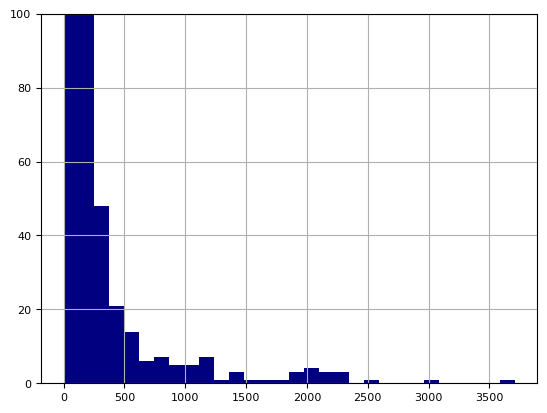

In [16]:
df["popularity"].hist(bins=30, xlabelsize=8, ylabelsize=8, color = "navy");
plt.ylim([0, 100])

# Figures

In [28]:
cols_for_countplot = ['type', 'status', 'year_air']

cols_for_histogram = ['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average', 'episode_run_time']

category_dict = {
    'Genre': ['Reality', 'Comedy', 'Documentary', 'Crime', 'Animation', 'Drama', 'other_genres'],
    'Languages': ['zh', 'fr', 'en', 'ja', 'other_languages'],
    'Original Languages': ['zh', 'fr', 'en', 'ko', 'ja', 'other_original_language'],
    'Network': ['TV', 'other_networks'],
    'Origin Country': ['CN', 'US', 'JP', 'GB', 'KR', 'other_origin_country'],
    'Spoken Languages': ['English', 'Franais', 'other_spoken_languages'],
    'Production Countries': ['China', 'United States of America', 'Japan', 'other_production_countries'],
    'Other': ['adult', 'in_production', 'tagline', 'compare_name']
}

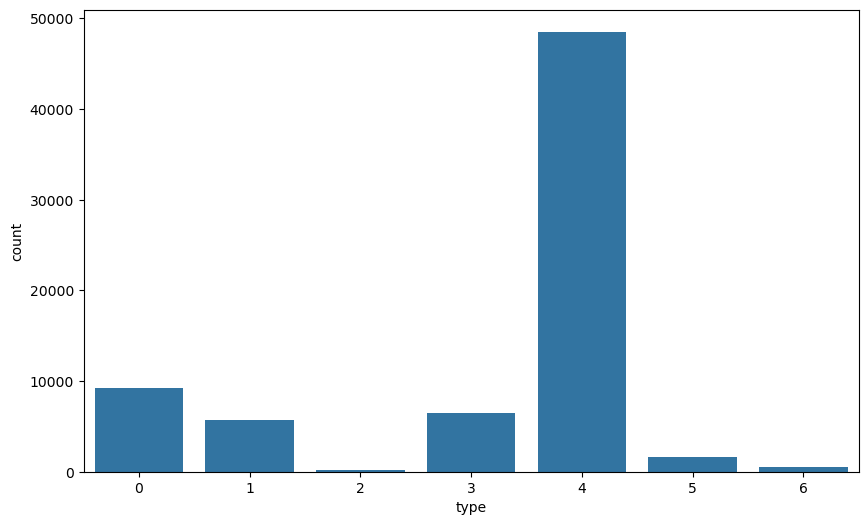

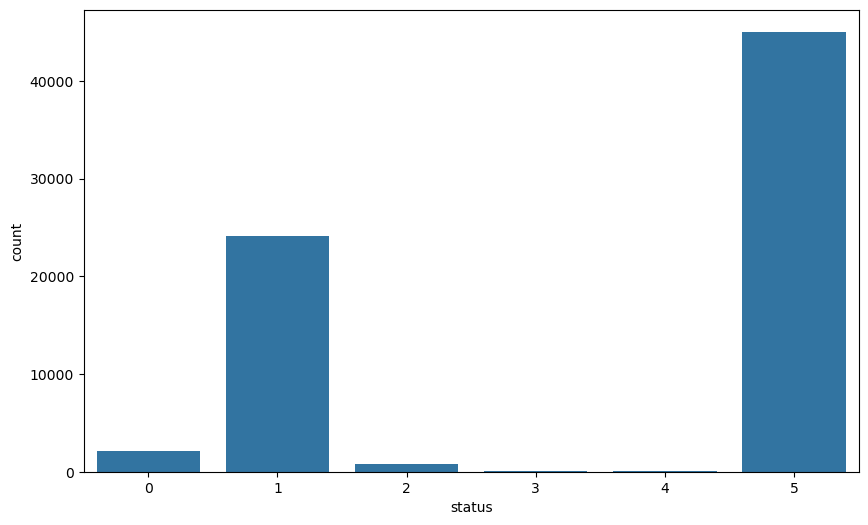

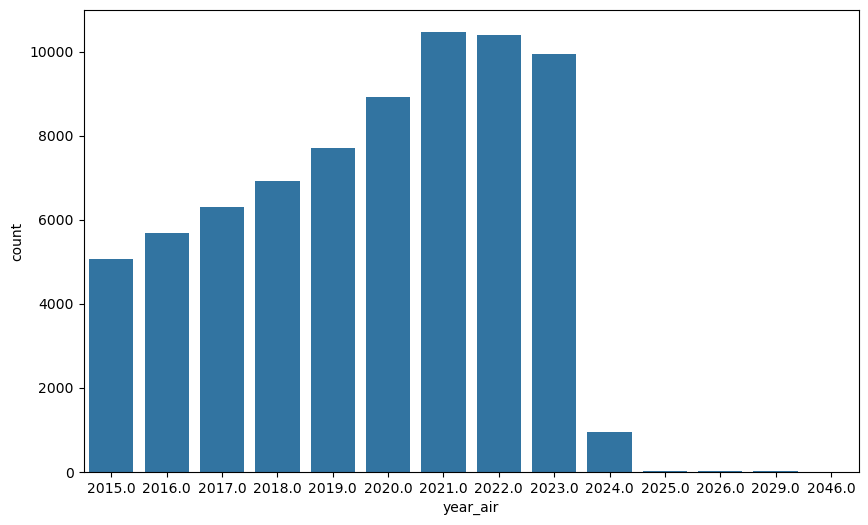

In [78]:
for category in cols_for_countplot: 
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=category);

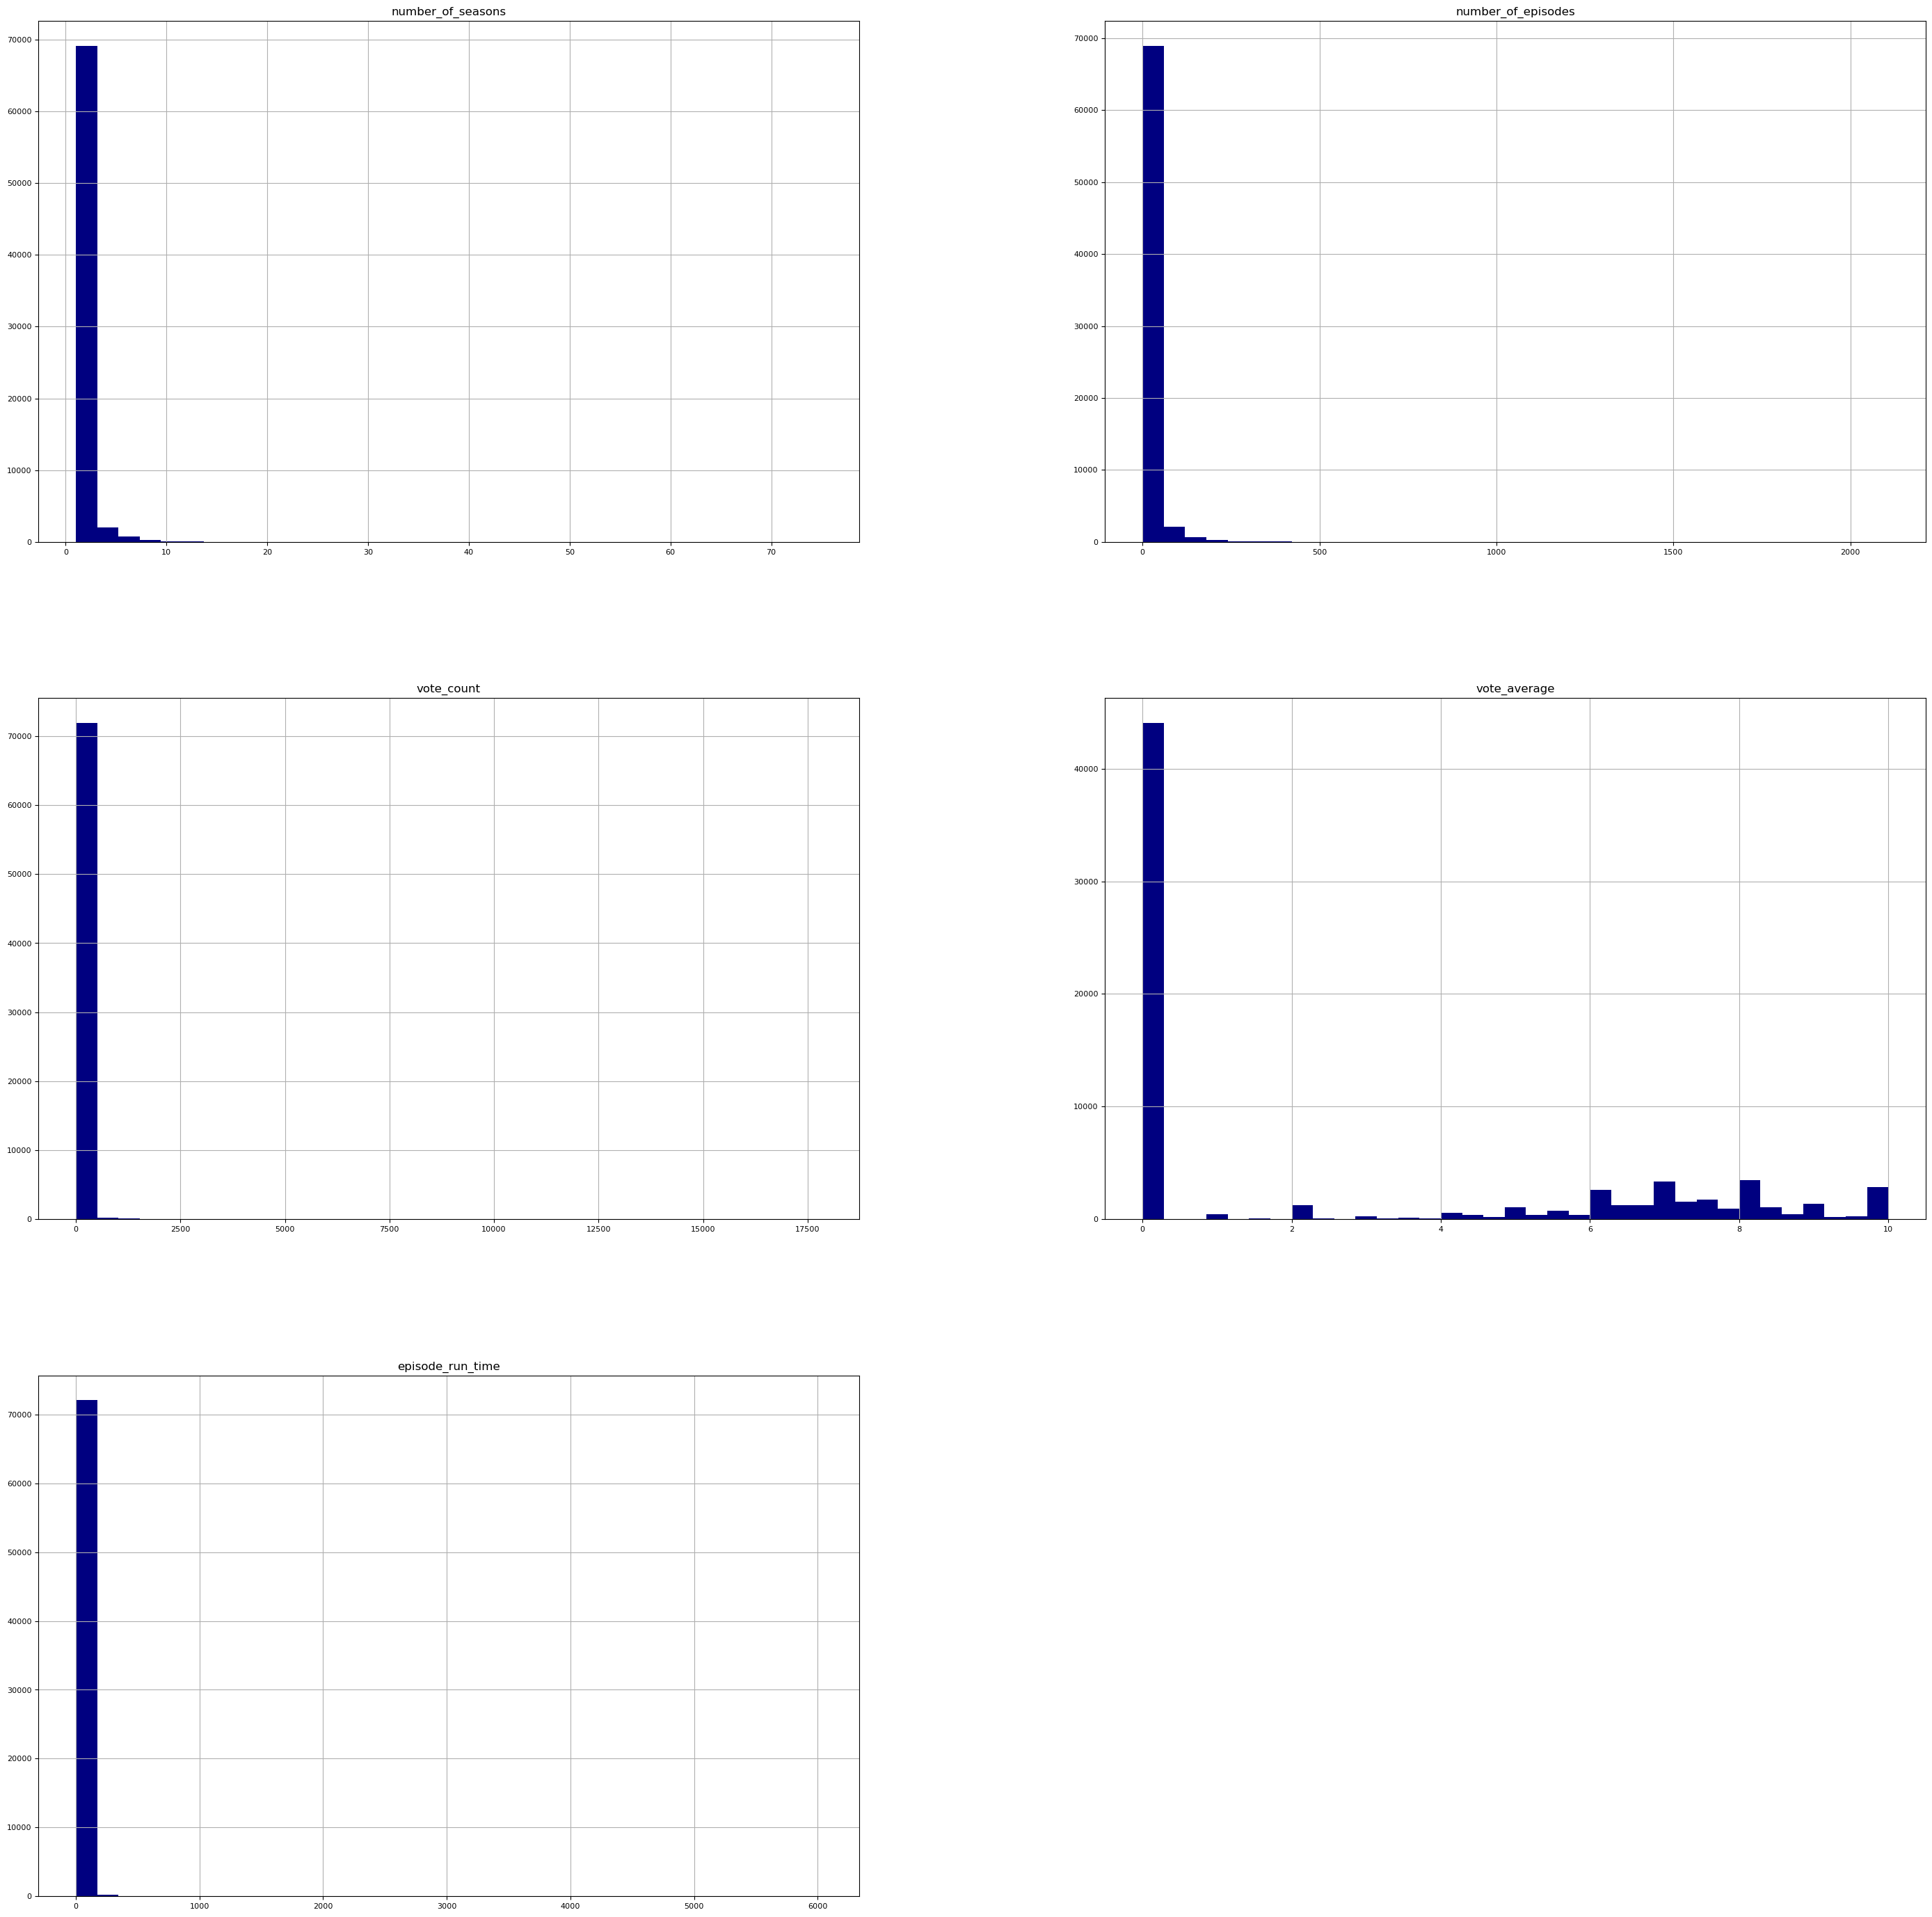

In [68]:
df[cols_for_histogram].hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");

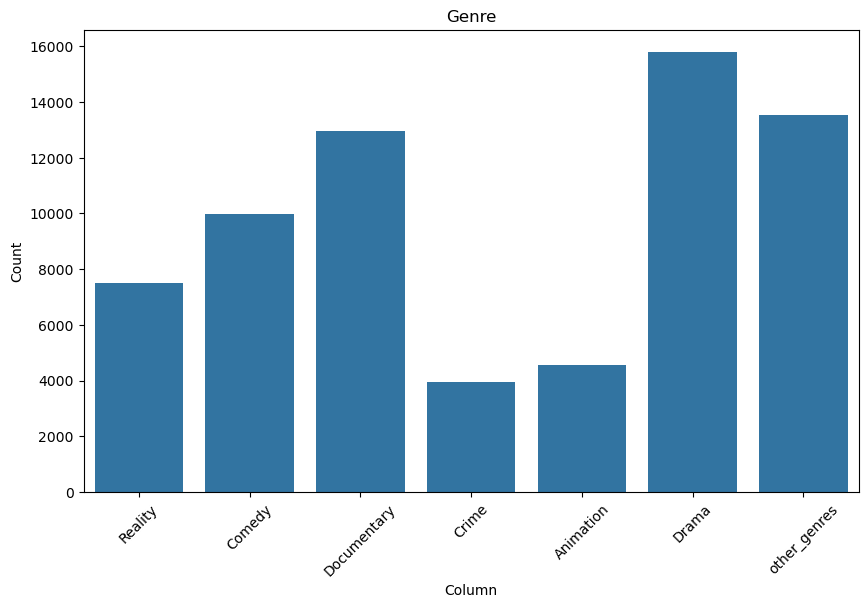

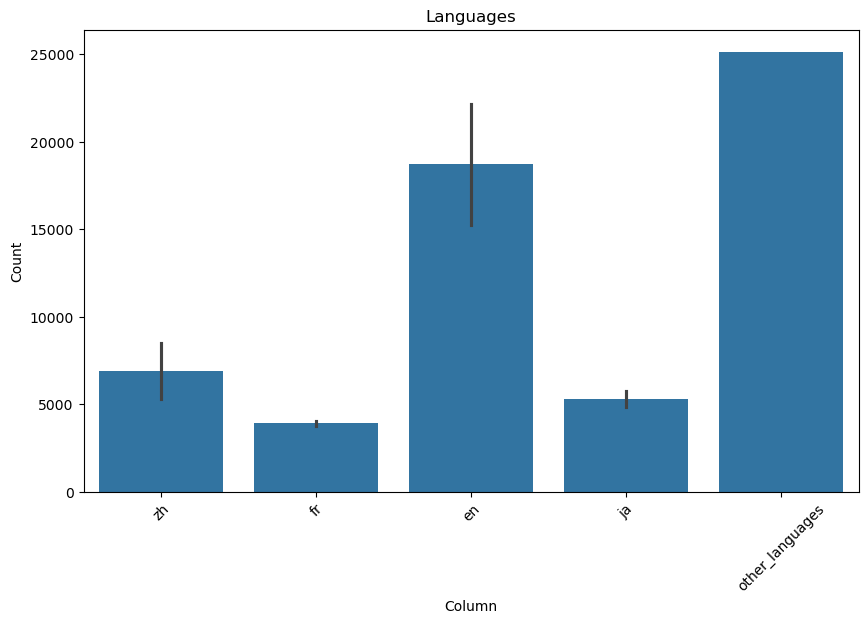

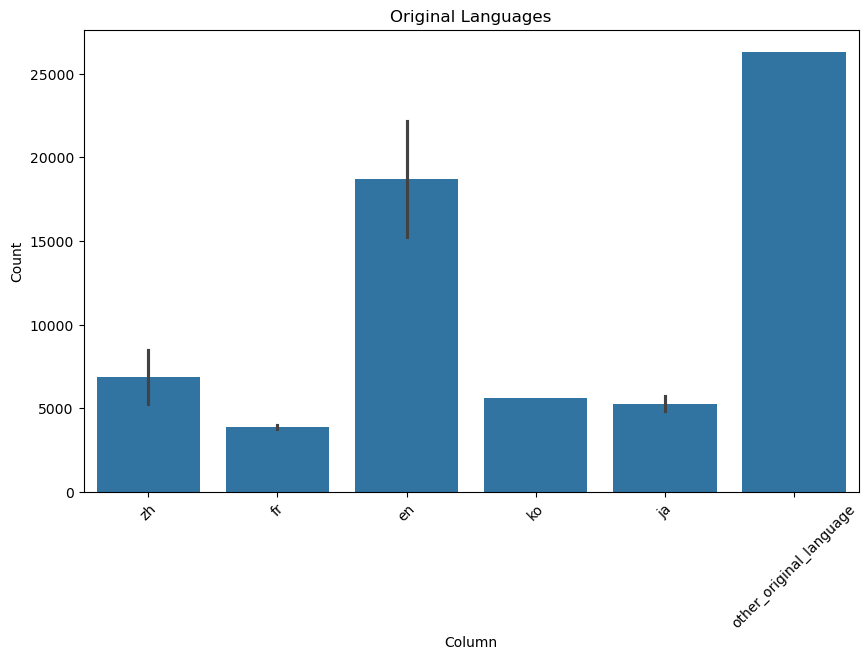

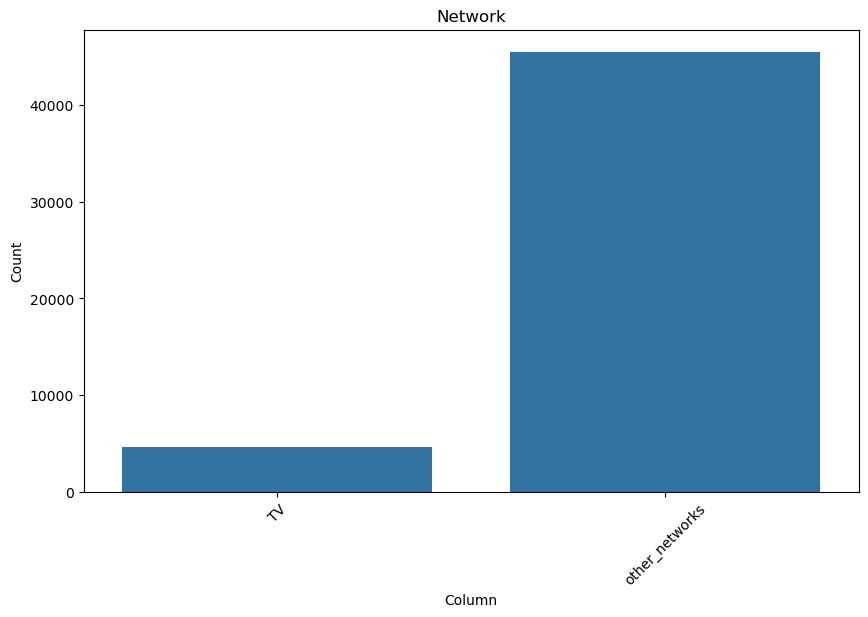

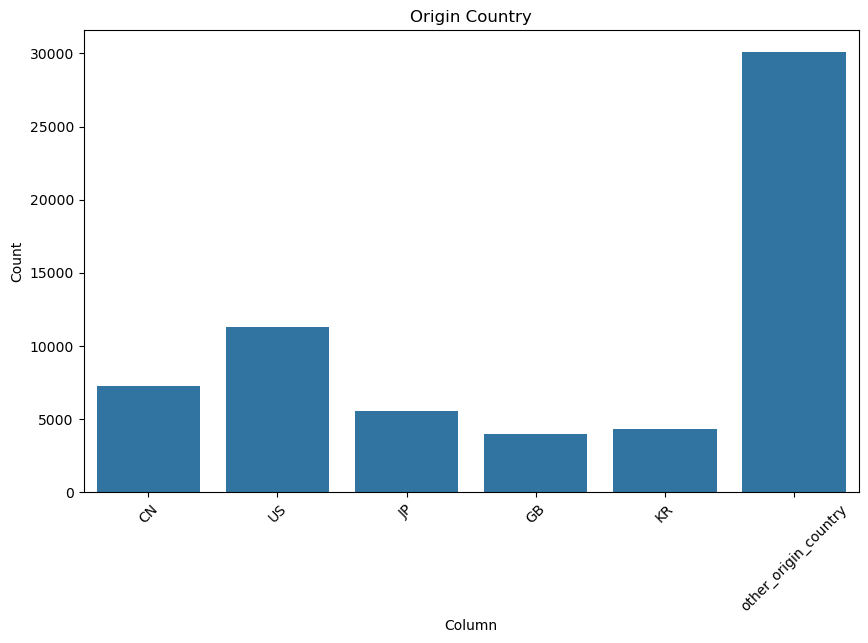

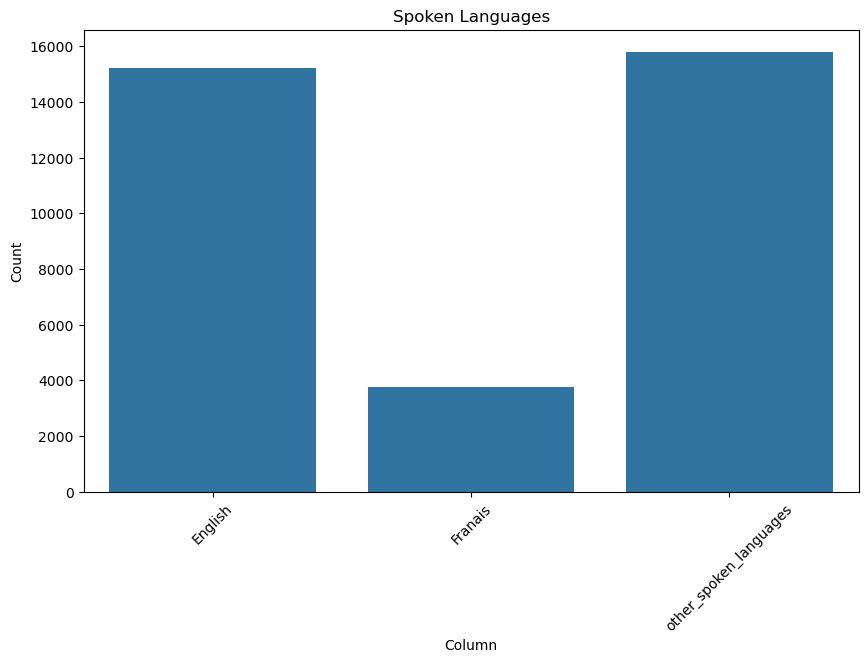

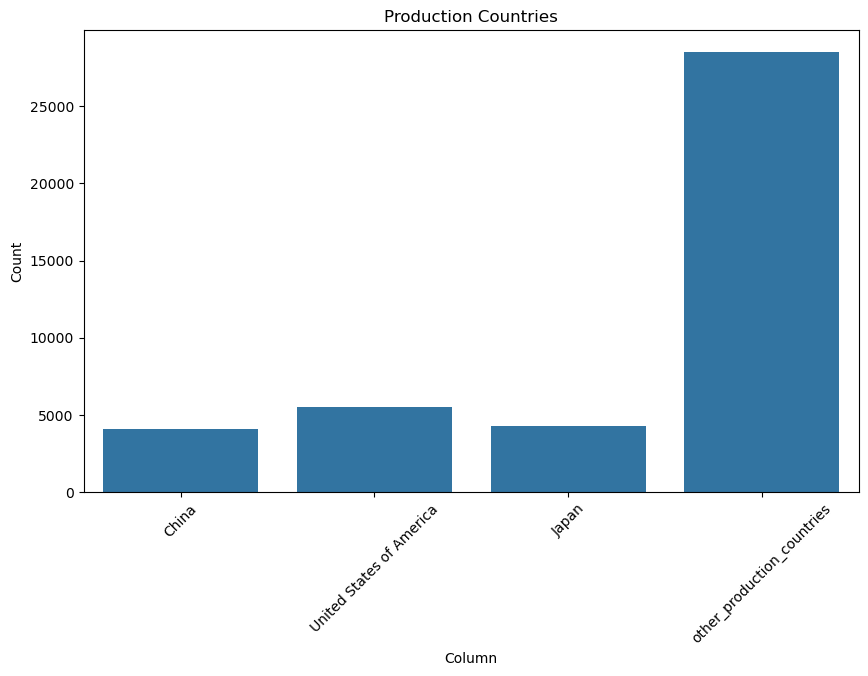

In [58]:
for i, (category, values) in zip(range(1,len(category_dict)+1), category_dict.items()):
    ones_count = df[values].sum()
    df_counts = pd.DataFrame({
    'Column': ones_count.index,
    'Count': ones_count.values
    })
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Column', y='Count', data=df_counts)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.title(category)
    plt.show()

## Skewness

In [82]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(df[cols_for_histogram].skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.map(highlight)

,skewness
episode_run_time,46.582265
vote_count,43.280886
number_of_episodes,14.998050
number_of_seasons,11.464479
vote_average,0.746785


# Correlations

In [92]:
df.corr()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,in_production,popularity,...,GB,KR,other_origin_country,Franais,English,other_spoken_languages,United States of America,China,Japan,other_production_countries
id,1.000000,-0.149098,-0.125472,-0.077932,-0.305179,-0.003437,0.609671,-0.121192,0.250993,-0.014282,...,-0.071378,0.009006,-0.014622,-0.032948,-0.087649,0.087772,-0.091179,0.032809,-0.051311,0.074688
number_of_seasons,-0.149098,1.000000,0.375953,0.070939,0.122422,-0.020506,-0.197323,0.041022,0.090392,0.074852,...,0.025179,-0.047163,0.033962,0.019746,0.071211,0.048748,0.078097,-0.041965,-0.067406,0.012707
number_of_episodes,-0.125472,0.375953,1.000000,0.035296,0.117104,-0.034852,-0.144839,0.040442,-0.025357,0.283691,...,-0.042001,-0.018360,0.049720,0.005895,-0.050388,0.016199,-0.009231,0.055721,-0.052527,0.004799
vote_count,-0.077932,0.070939,0.035296,1.000000,0.106584,-0.007415,-0.029331,0.009926,-0.046384,0.138869,...,-0.001721,-0.002908,-0.046271,-0.015578,0.072663,-0.019342,0.100837,-0.027963,0.006608,-0.058540
vote_average,-0.305179,0.122422,0.117104,0.106584,1.000000,0.031415,-0.081268,0.085120,-0.281312,0.089555,...,0.039768,-0.021909,-0.042267,-0.058324,0.102823,-0.063337,0.128994,-0.058713,0.115833,-0.126086
adult,-0.003437,-0.020506,-0.034852,-0.007415,0.031415,1.000000,-0.010116,-0.021165,-0.035263,-0.013344,...,-0.024182,-0.030279,-0.060411,-0.029031,-0.051658,-0.064668,-0.031388,-0.035635,0.252704,-0.118841
first_air_date,0.609671,-0.197323,-0.144839,-0.029331,-0.081268,-0.010116,1.000000,-0.122224,0.240090,0.019238,...,-0.037924,0.025086,0.010301,-0.016266,-0.061562,0.025374,-0.041777,0.014819,-0.026979,0.037361
last_air_date,-0.121192,0.041022,0.040442,0.009926,0.085120,-0.021165,-0.122224,1.000000,-0.067943,0.007442,...,0.001431,0.011358,0.010841,0.008972,0.004784,0.005902,-0.004679,0.026097,-0.044375,0.015342
in_production,0.250993,0.090392,-0.025357,-0.046384,-0.281312,-0.035263,0.240090,-0.067943,1.000000,-0.004326,...,-0.012657,0.001272,0.019645,0.043102,0.045511,0.073766,0.018549,-0.017334,-0.147961,0.090060
popularity,-0.014282,0.074852,0.283691,0.138869,0.089555,-0.013344,0.019238,0.007442,-0.004326,1.000000,...,-0.008740,-0.009433,-0.003712,-0.005237,0.028488,-0.012820,0.054818,-0.020895,0.002589,-0.027666


<Axes: >

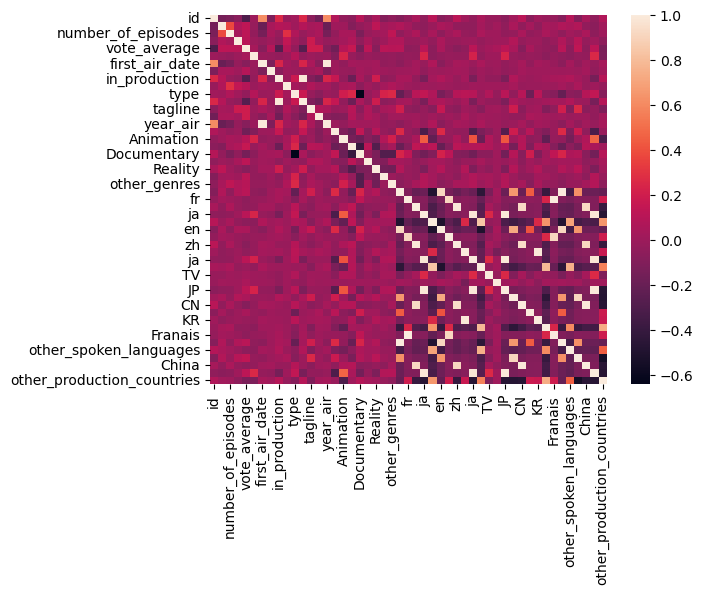

In [96]:
sns.heatmap(df.corr())